In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
FILE = 'training_set_VU_DM.csv'
training = pd.read_csv(FILE)

In [13]:
FILE = 'test_set_VU_DM.csv'
test = pd.read_csv(FILE)

In [3]:
training.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


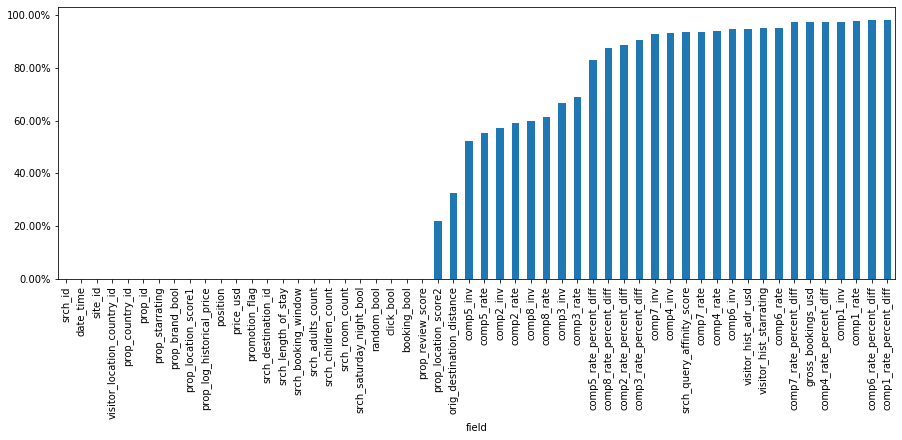

In [4]:
# How many values are missing?
missing=[]
for i in training:
    missing.append({'field':i,'percent':len(training[training[i].isnull()])/training.shape[0]})
miss=pd.DataFrame(sorted(missing, key=lambda k: k['percent']))
plt.rcParams["figure.figsize"]=[15,5]
ax=miss.plot.bar(x='field',y='percent',legend=None)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);

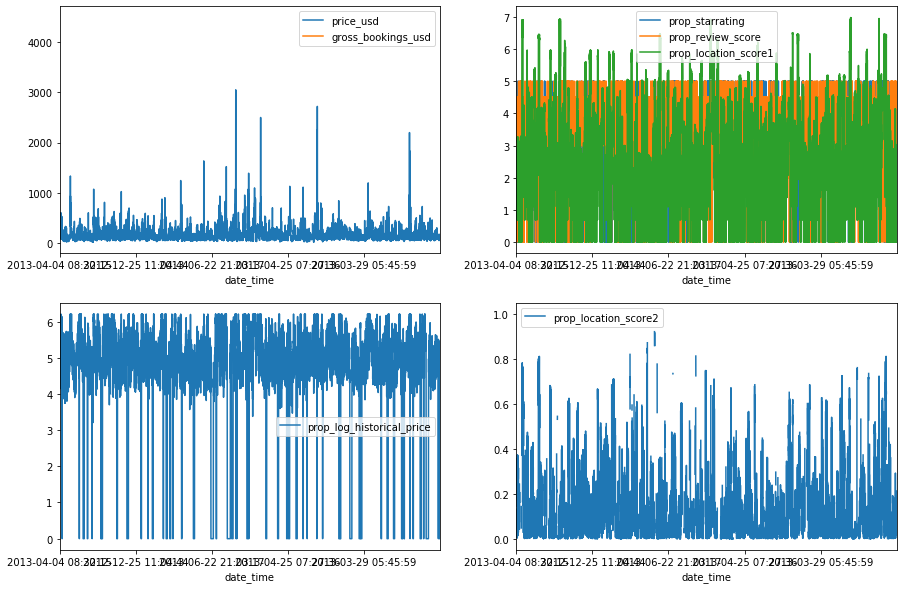

In [5]:
# datetime histogram of prices & scores
plt.rcParams["figure.figsize"]=[15,10]
fig, axes = plt.subplots(nrows=2, ncols=2)
size=10000
training[:size].plot(x='date_time',y='price_usd',ax=axes[0,0])
training[:size].plot(x='date_time',y='gross_bookings_usd',ax=axes[0,0])

training[:size].plot(x='date_time',y='prop_starrating',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_review_score',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_location_score1',ax=axes[0,1])

training[:size].plot(x='date_time',y='prop_log_historical_price',ax=axes[1,0])

training[:size].plot(x='date_time',y='prop_location_score2',ax=axes[1,1]);

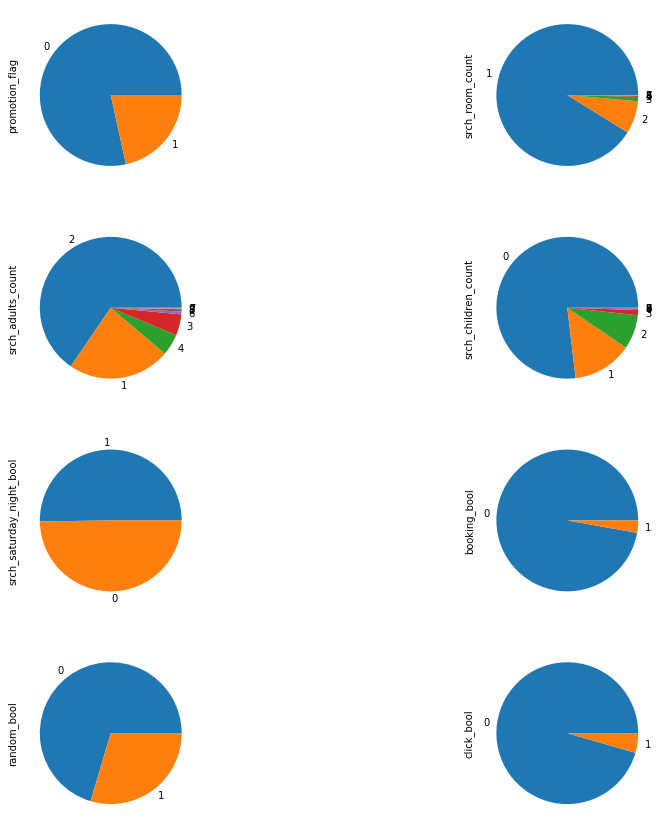

In [6]:
# plot bools
plt.rcParams["figure.figsize"]=[15,15]
fig, axes = plt.subplots(nrows=4, ncols=2)

training.promotion_flag.value_counts().plot.pie(ax=axes[0,0])
training.srch_room_count.value_counts().plot.pie(ax=axes[0,1])
training.srch_adults_count.value_counts().plot.pie(ax=axes[1,0])
training.srch_children_count.value_counts().plot.pie(ax=axes[1,1])
training.srch_saturday_night_bool.value_counts().plot.pie(ax=axes[2,0])
training.booking_bool.value_counts().plot.pie(ax=axes[2,1])
training.random_bool.value_counts().plot.pie(ax=axes[3,0])
training.click_bool.value_counts().plot.pie(ax=axes[3,1]);

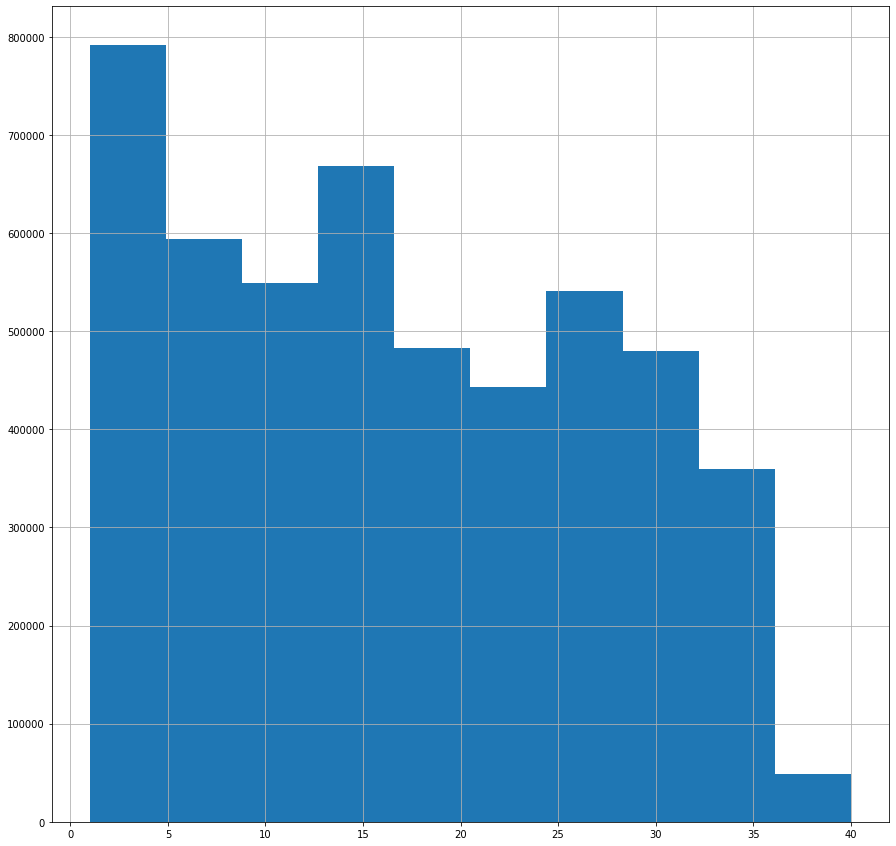

In [7]:
training.position.hist()

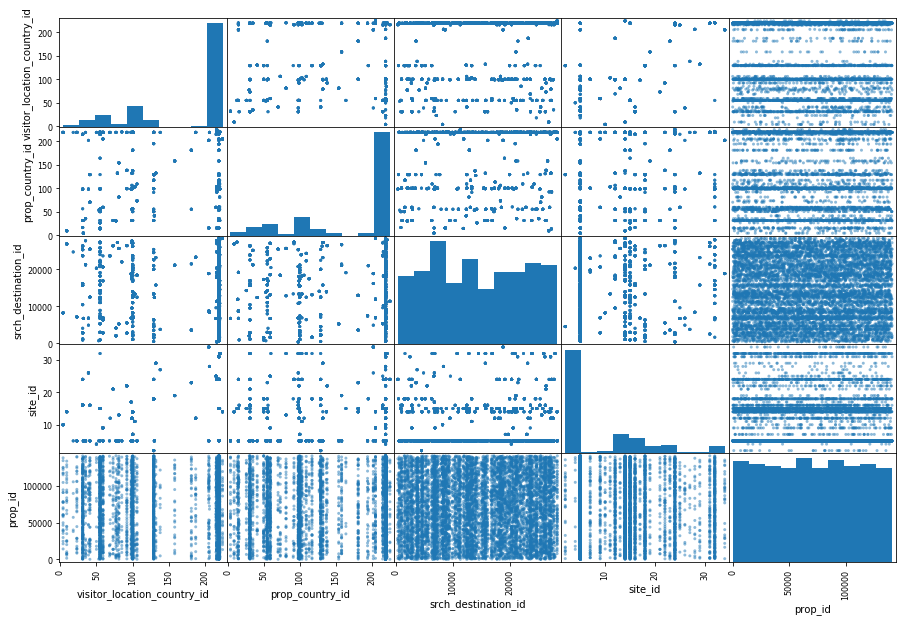

In [8]:
# compare the IDs
plt.rcParams["figure.figsize"]=[15,10]
scatter_matrix(training[:size][['visitor_location_country_id','prop_country_id','srch_destination_id','site_id','prop_id']]);

In [9]:
# Correlation between visitor & property country id
training.visitor_location_country_id.corr(training.prop_country_id)

0.4827869798886605

In [12]:
classifier = RandomForestClassifier(n_estimators=100,
                                        verbose=2,
                                        n_jobs=-1,
                                        min_samples_split=10,
                                        random_state=1)

In [14]:
training=training.fillna(value=0)
test=test.fillna(value=0)

training['weekday']=pd.to_datetime(training['date_time']).dt.weekday
test['weekday']=pd.to_datetime(test['date_time']).dt.weekday

feature_names = list(training.columns)
feature_names.remove("click_bool")
feature_names.remove("booking_bool")
feature_names.remove("gross_bookings_usd")
feature_names.remove("date_time")
feature_names.remove("position")

In [16]:
classifier.fit(training[feature_names].values, training['booking_bool'].values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100building tree 6 of 100building tree 7 of 100building tree 8 of 100


building tree 9 of 100building tree 10 of 100
building tree 11 of 100building tree 12 of 100building tree 13 of 100

building tree 14 of 100

building tree 15 of 100
building tree 16 of 100


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min


building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100building tree 62 of 100

building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=2,
                       warm_start=False)

In [17]:
predictions = classifier.predict_proba(test[feature_names].values)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   38.4s finished


In [21]:
submission = pd.concat([test[['srch_id','prop_id']], pd.DataFrame.from_records(predictions)], axis=1, names=['a','b','c','d'])
submission = submission.sort_values(['srch_id',0],ascending=False)[['srch_id','prop_id',0]]
submission.to_csv('Rand_Forest-submission.csv',columns=['srch_id','prop_id'], index=None)

In [1]:
submission

NameError: name 'submission' is not defined